# Desafio - Modulo de Regressão Linear

In [1]:
# Bibliotecas

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot 

In [3]:
# Carregar csv

df_irrigacao = pd.read_csv('.\datasets\dados_de_irrigacao.csv')

## EDA

In [4]:
# Features
df_irrigacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


Verificamos que não há dados nulos

In [6]:
# Primeiras 10 linhas
df_irrigacao.head(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
5,6,600,400.000000
6,7,700,466.666667
7,8,800,533.333333
8,9,900,600.000000
9,10,1000,666.666667


In [7]:
# Ultimas 10 linhas
df_irrigacao.tail(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
289,290,29000,19333.333333
290,291,29100,19400.000000
291,292,29200,19466.666667
292,293,29300,19533.333333
293,294,29400,19600.000000
294,295,29500,19666.666667
295,296,29600,19733.333333
296,297,29700,19800.000000
297,298,29800,19866.666667
298,299,29900,19933.333333


In [5]:
# Medidas estatisticas

df_irrigacao.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada por Ângulo'>

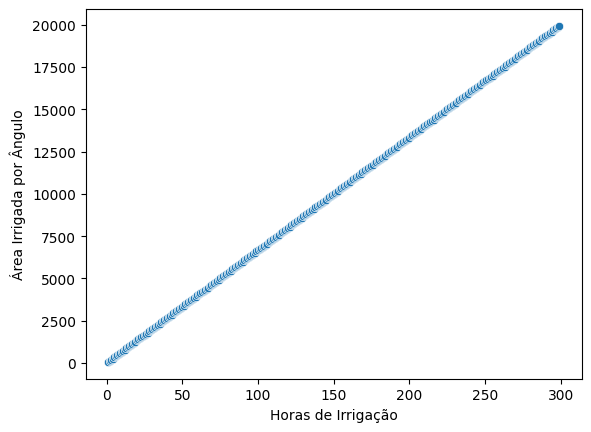

In [8]:
sns.scatterplot(data= df_irrigacao, x='Horas de Irrigação', y='Área Irrigada por Ângulo')

Verificamos pelo gráfico que a uma correlação positiva entre as variaveis 'Horas de irrigação' e 'Área irrigada por Ângulo'

<Axes: ylabel='Horas de Irrigação'>

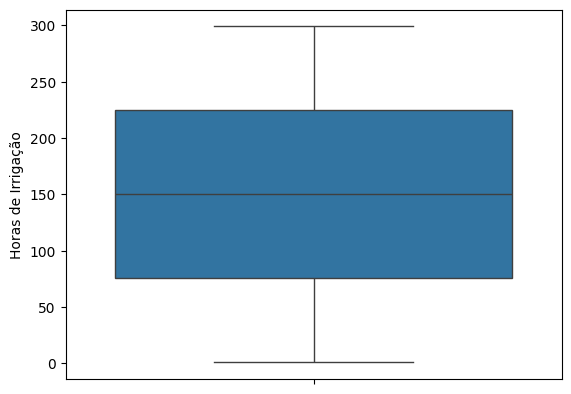

In [12]:
# Verificacao de outilier
sns.boxplot(df_irrigacao, y='Horas de Irrigação')

<Axes: ylabel='Área Irrigada por Ângulo'>

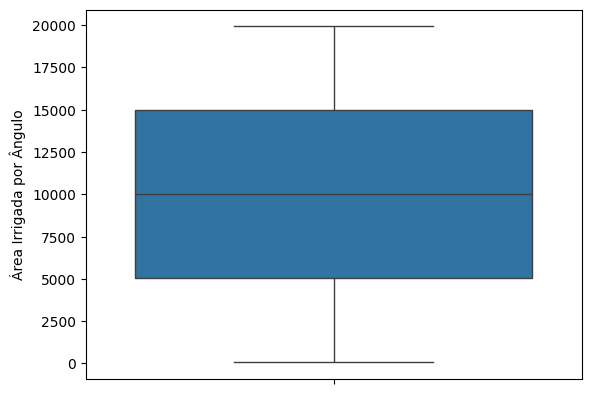

In [13]:
sns.boxplot(df_irrigacao, y='Área Irrigada por Ângulo')

Não há outliers nas variáveis

<Axes: >

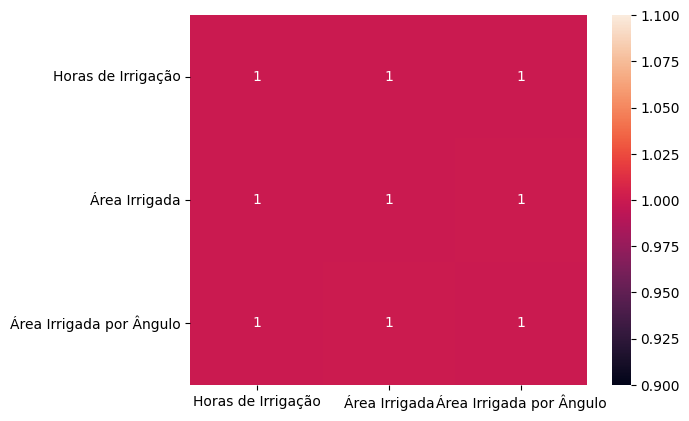

In [10]:
# Mapa de calor
sns.heatmap(df_irrigacao.corr('pearson'), annot=True)

<Axes: >

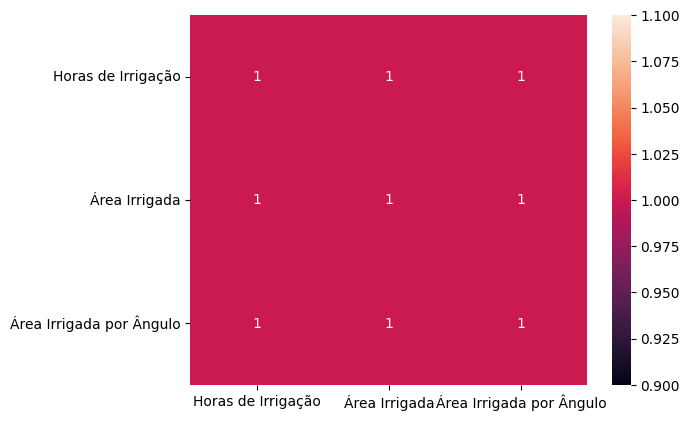

In [11]:
sns.heatmap(df_irrigacao.corr('spearman'), annot=True)

<Axes: xlabel='Horas de Irrigação', ylabel='Count'>

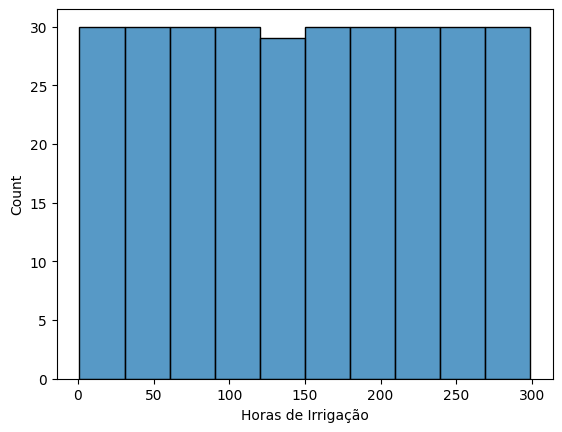

In [14]:
sns.histplot(df_irrigacao, x='Horas de Irrigação')

<Axes: xlabel='Área Irrigada por Ângulo', ylabel='Count'>

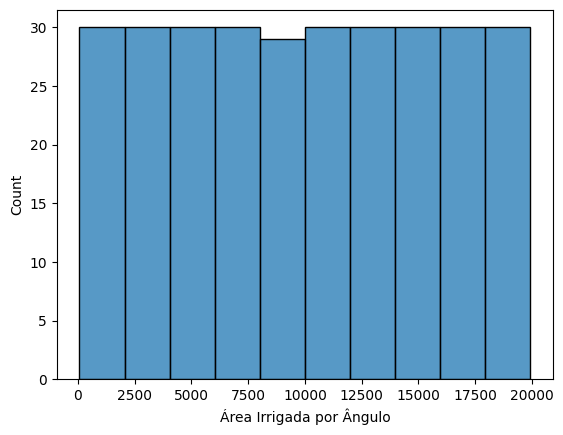

In [15]:
sns.histplot(df_irrigacao, x='Área Irrigada por Ângulo')

## Treinar modelo

In [ ]:
# x -> Variavel indendente e Y-> Variavel dependente (resposta)
x = df_irrigacao['Horas de Irrigação'].values.reshape(-1,1)
y = df_irrigacao['Área Irrigada por Ângulo'].values.reshape(-1,1)

In [ ]:
# Gerando conjunto de treino e de teste
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=50)

In [ ]:
# Treinando modelo
modelo = LinearRegression()
modelo.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Funcao da reta
print('A equacao da reta é y = {}x + {}'.format(modelo.coef_[0][0], modelo.intercept_[0]))

A equacao da reta é y = 66.66666666666664x + 3.637978807091713e-12


## Validação das metricas

In [ ]:
# Predicao dos valores respostas com base no conjunto de teste
y_pred = modelo.predict(x_test)

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Calulo da metrica R-score
r2_score(y_test, y_pred)

1.0

Houve uma predição perfeita dos dados

In [ ]:
# Calculo da metrica MAE
mean_absolute_error(y_test, y_pred)

1.8764644159495625e-12

Houve uma media de erros de praticamente 0, modelo preveu os valores com alta precisão

In [29]:
# Calculo da metrica MSE
mean_squared_error(y_test, y_pred)

5.0788674199138044e-24

Valor continuou praticamente nulo, uma vez que não possuimos outliers que poderiam aumentar o erro

In [31]:
# Calculo da metrica RMSE

import numpy as np
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(2.2536342693333814e-12)

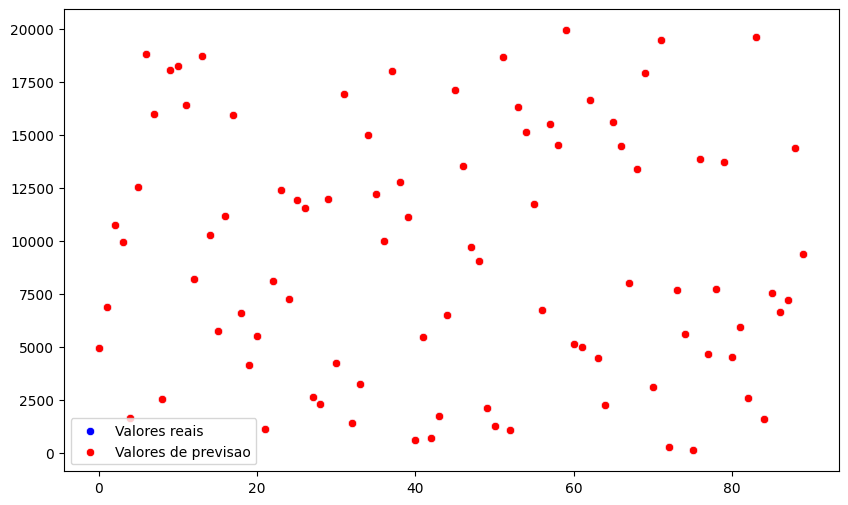

In [34]:
# Analise gráfica dos dados reais e previsto
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores de previsao')
plt.legend
plt.show()

Esse gráfico confirma nossa analise de dados, de que a previsao possui alta precisao

## Analise de Resíduos


In [35]:
# calculo de risduos
residuos = y_test - y_pred

In [36]:
from scipy.stats import zscore
# residuos padronizados 
residuos_std = zscore(residuos)

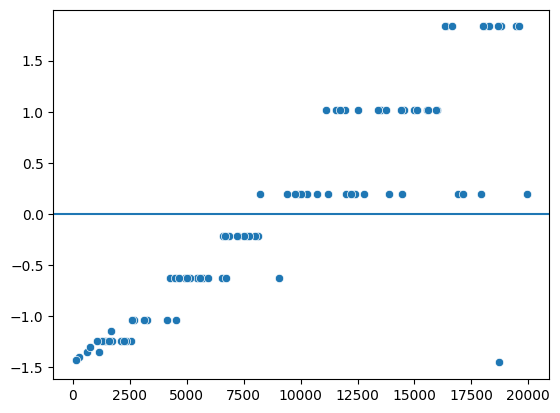

In [38]:
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

Como os resiuos estão entre 2 e -2 , temos uma linearidade
Não temos homocedasticidade, uma vez que os residuos não estao ao redor do eixo y=0

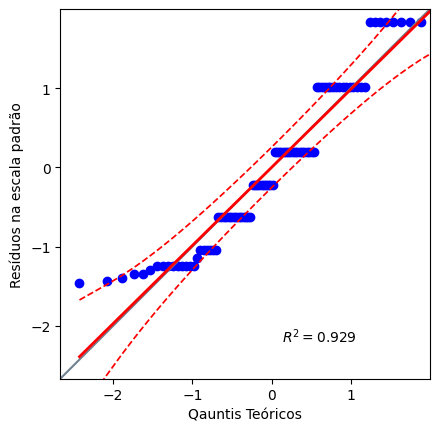

In [40]:
import pingouin as pg
# Verificar se os residuos seguem uma distribuição normal
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Qauntis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

O modelo tende a distribuição normal, porem há assimetrias

In [41]:
# Teste de Normalidade - Shapiro Wilk
# H0: segue distribuicao normal
# H1: Nao segue distribuicao normal
# Se o pvalor > 0.05 não rejeita h0, caso contrario rejeitamos

shat_shapiro, pvalue_shapiro = shapiro(residuos.reshape(-1))
print("Estatitica do teste {} e p-valor {}".format(shat_shapiro, pvalue_shapiro))

Estatitica do teste 0.9188782351154261 e p-valor 3.150814299065697e-05


Como p-valor é menos que 0.05, aceitamos h0

In [42]:
# Teste de Normalidade - Kolmogorov=Shirnov
# H0: segue distribuicao normal
# H1: Nao segue distribuicao normal
# Se o pvalor > 0.05 não rejeita h0, caso contrario rejeitamos

shat_ks, pvalue_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatitica do teste {} e p-valor {}".format(shat_ks, pvalue_ks))

Estatitica do teste 0.49999999999854866 e p-valor 2.4869515023142266e-21


Como p-valor é menos que 0.05, aceitamos h0

## Predições

In [ ]:
# Área irrigada por angulo por 15 horas de irrigação
modelo.predict([[15]])

array([[1000.]])

In [45]:
# Quantas horas de irrigação são necessarias para irrigar 9000 m de area por angulo
(9000 - modelo.intercept_[0])/modelo.coef_[0][0]

np.float64(135.0)